0        0.000211
1        0.000083
2        0.000084
3        0.000062
4        0.000076
           ...   
20382    0.000398
20383    0.000310
20384    0.000096
20385    0.000203
20386    0.000287
Name: Rot.err.(deg/100m), Length: 20387, dtype: float64
       index  Rotation error (deg/100m)  Translation errror (%) [m/m]  \
0          0                   1.208179                      1.176584   
1          0                   0.474292                      2.118321   
2          0                   0.479821                      2.338595   
3          0                   0.354511                      2.410806   
4          0                   0.434527                      2.268676   
...      ...                        ...                           ...   
20382   4000                   2.281921                      1.500020   
20383   4010                   1.773604                      3.700613   
20384   4020                   0.549606                      1.485299   
20385   4030    

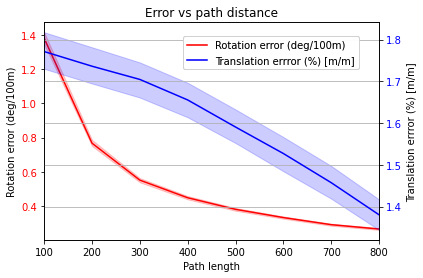

In [25]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv


dd = pd.read_csv('./Mulran_generalization_2021-08-04_23:19.txt', sep=r' ', header=0)
print(dd["Rot.err.(deg/100m)"]) 
dd = dd.rename(columns={'length': 'Path length',})
dd = dd.rename(columns={'Rot.err.(deg/100m)': 'Rotation error (deg/100m)',}) 
dd = dd.rename(columns={'Trans.err.(%)': 'Translation errror (%) [m/m]',}) 
#df['Rot.err.(deg/100m)'] = df['Rot.err.(deg/100m)'].apply(lambda x: x180.0/math.pi100) 
dd['Rotation error (deg/100m)'] = dd['Rotation error (deg/100m)']*180/math.pi*100 
dd['Translation errror (%) [m/m]'] = dd['Translation errror (%) [m/m]']*100
print(dd)
ax1=sns.lineplot(data=dd, x="Path length", y="Rotation error (deg/100m)", color='red',label = 'Rotation error (deg/100m)', legend=False) 
#plt.legend(loc='upper center') 
ax1.tick_params(axis='y', labelcolor='red') 
#sns_plot = sns.pointplot(x="Path length", y="Rot.err.(deg/100m)", data=dd, legend_out=False,palette=sns.color_palette(["#FF0000"]),linestyles=["-", "--"])
ax2 = ax1.twinx() 
sns.lineplot(data=dd, x="Path length", y="Translation errror (%) [m/m]", color='blue',label = 'Translation errror (%) [m/m]',legend=False,ax=ax2) 
ax2.tick_params(axis='y', labelcolor='blue') 
ax1.figure.legend(loc='upper center',bbox_to_anchor=(0.65, 0.85)) 
ax2.figure.legend(loc='upper center',bbox_to_anchor=(0.65, 0.85)) 
#plt.legend(loc='upper right') 
#p=[ax1, ax2] 
#sns_plot.legend(p, [p_.get_label() for p_ in p], #loc= 'center', fontsize= 'small')

#sns_plot = sns.pointplot(x="Path length", y="Trans.err.(%)", kind="box", dodge=True, data=dd, legend_out=False, par=p)
#sns_plot.legend(loc='upper right', ncol=1) 
plt.title('Error vs path distance') 
plt.xlim(100,800) 
plt.grid() 
plt.show() 
#ax2.figure.savefig('./output/Path_error.', format='eps')
#plt.savefig('./output/Path_error.png', dpi=300, bbox_inches='tight')

ax1.figure.savefig('./output/Path_error.png', format='png', dpi=500)
#ax1.figure.savefig('./output/Path_error.eps', format='eps')
ax1.figure.savefig('./output/mulran_path_error.pdf.pdf')

